In [15]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import glob
import re
%matplotlib inline
from IPython.display import display
from collections import OrderedDict

In [2]:
def computeSpeedupEfficiency(df):
    """
    Given a datafram with index of the number of threads, and the colums 
    multiple time measurements, computer the derived speed up and efficiency.
    """
    
    for colName in df.columns:
        cloc = df.columns.get_loc(colName)
        
        # time with 1 thread
        t1 = df.iloc[0][colName]
    
        #df["Optimal"] = df_2d.iloc[0,1]/df_2d.index.values*(1.0)
        df.insert(loc=cloc+1,
                     column="Relative Speedup {0}".format(colName),
                     value=t1/df.iloc[:,cloc])
        df.insert(loc=cloc+1,
                     column="Relative Efficiency {0}".format(colName),
                     value=t1/(df.iloc[:,cloc]*df.index))

In [18]:
df_dict = {re.search('performance_vhm_lab(.*).csv',f).group(0):pd.read_csv(f) for f in glob.glob("*.csv")}
df_dict = OrderedDict(sorted(df_dict.items(), key=lambda t: t[0]))
for k in df_dict.keys():

    m=re.search('performance_vhm_lab_100_(.+).csv',k)
    if(m):
        newk = m.group(1)
        df_dict[newk]=df_dict.pop(k)
        k=newk
    else:
        del(df_dict[k])
        print("removing {0}".format(k))
        continue;
    df_dict[k].set_index(df_dict[k].columns[0],inplace=True)
    df_dict[k].sort_index(inplace=True)
    computeSpeedupEfficiency(df_dict[k])

removing performance_vhm_lab.csv
removing performance_vhm_lab_100.csv


In [19]:
print(df_dict.keys())

['Platform-ITKv5', 'Platform', 'Pool-ITKv5', 'Pool', 'TBB-ITKv5', 'TBB']


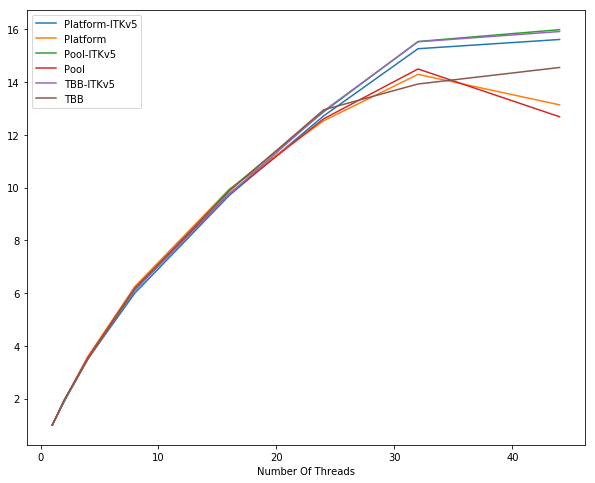

In [20]:
plot_data=pd.concat([df_dict[k]["With Connectivity"] for k in df_dict.keys()],axis=1,keys=df_dict.keys())
plot_data=pd.concat([df_dict[k]["Relative Speedup With Connectivity"] for k in df_dict.keys()],axis=1,keys=df_dict.keys())
plt.figure(dpi=320, figsize=(10, 10))
ax = plot_data.loc[:44].plot(figsize=(10, 8))

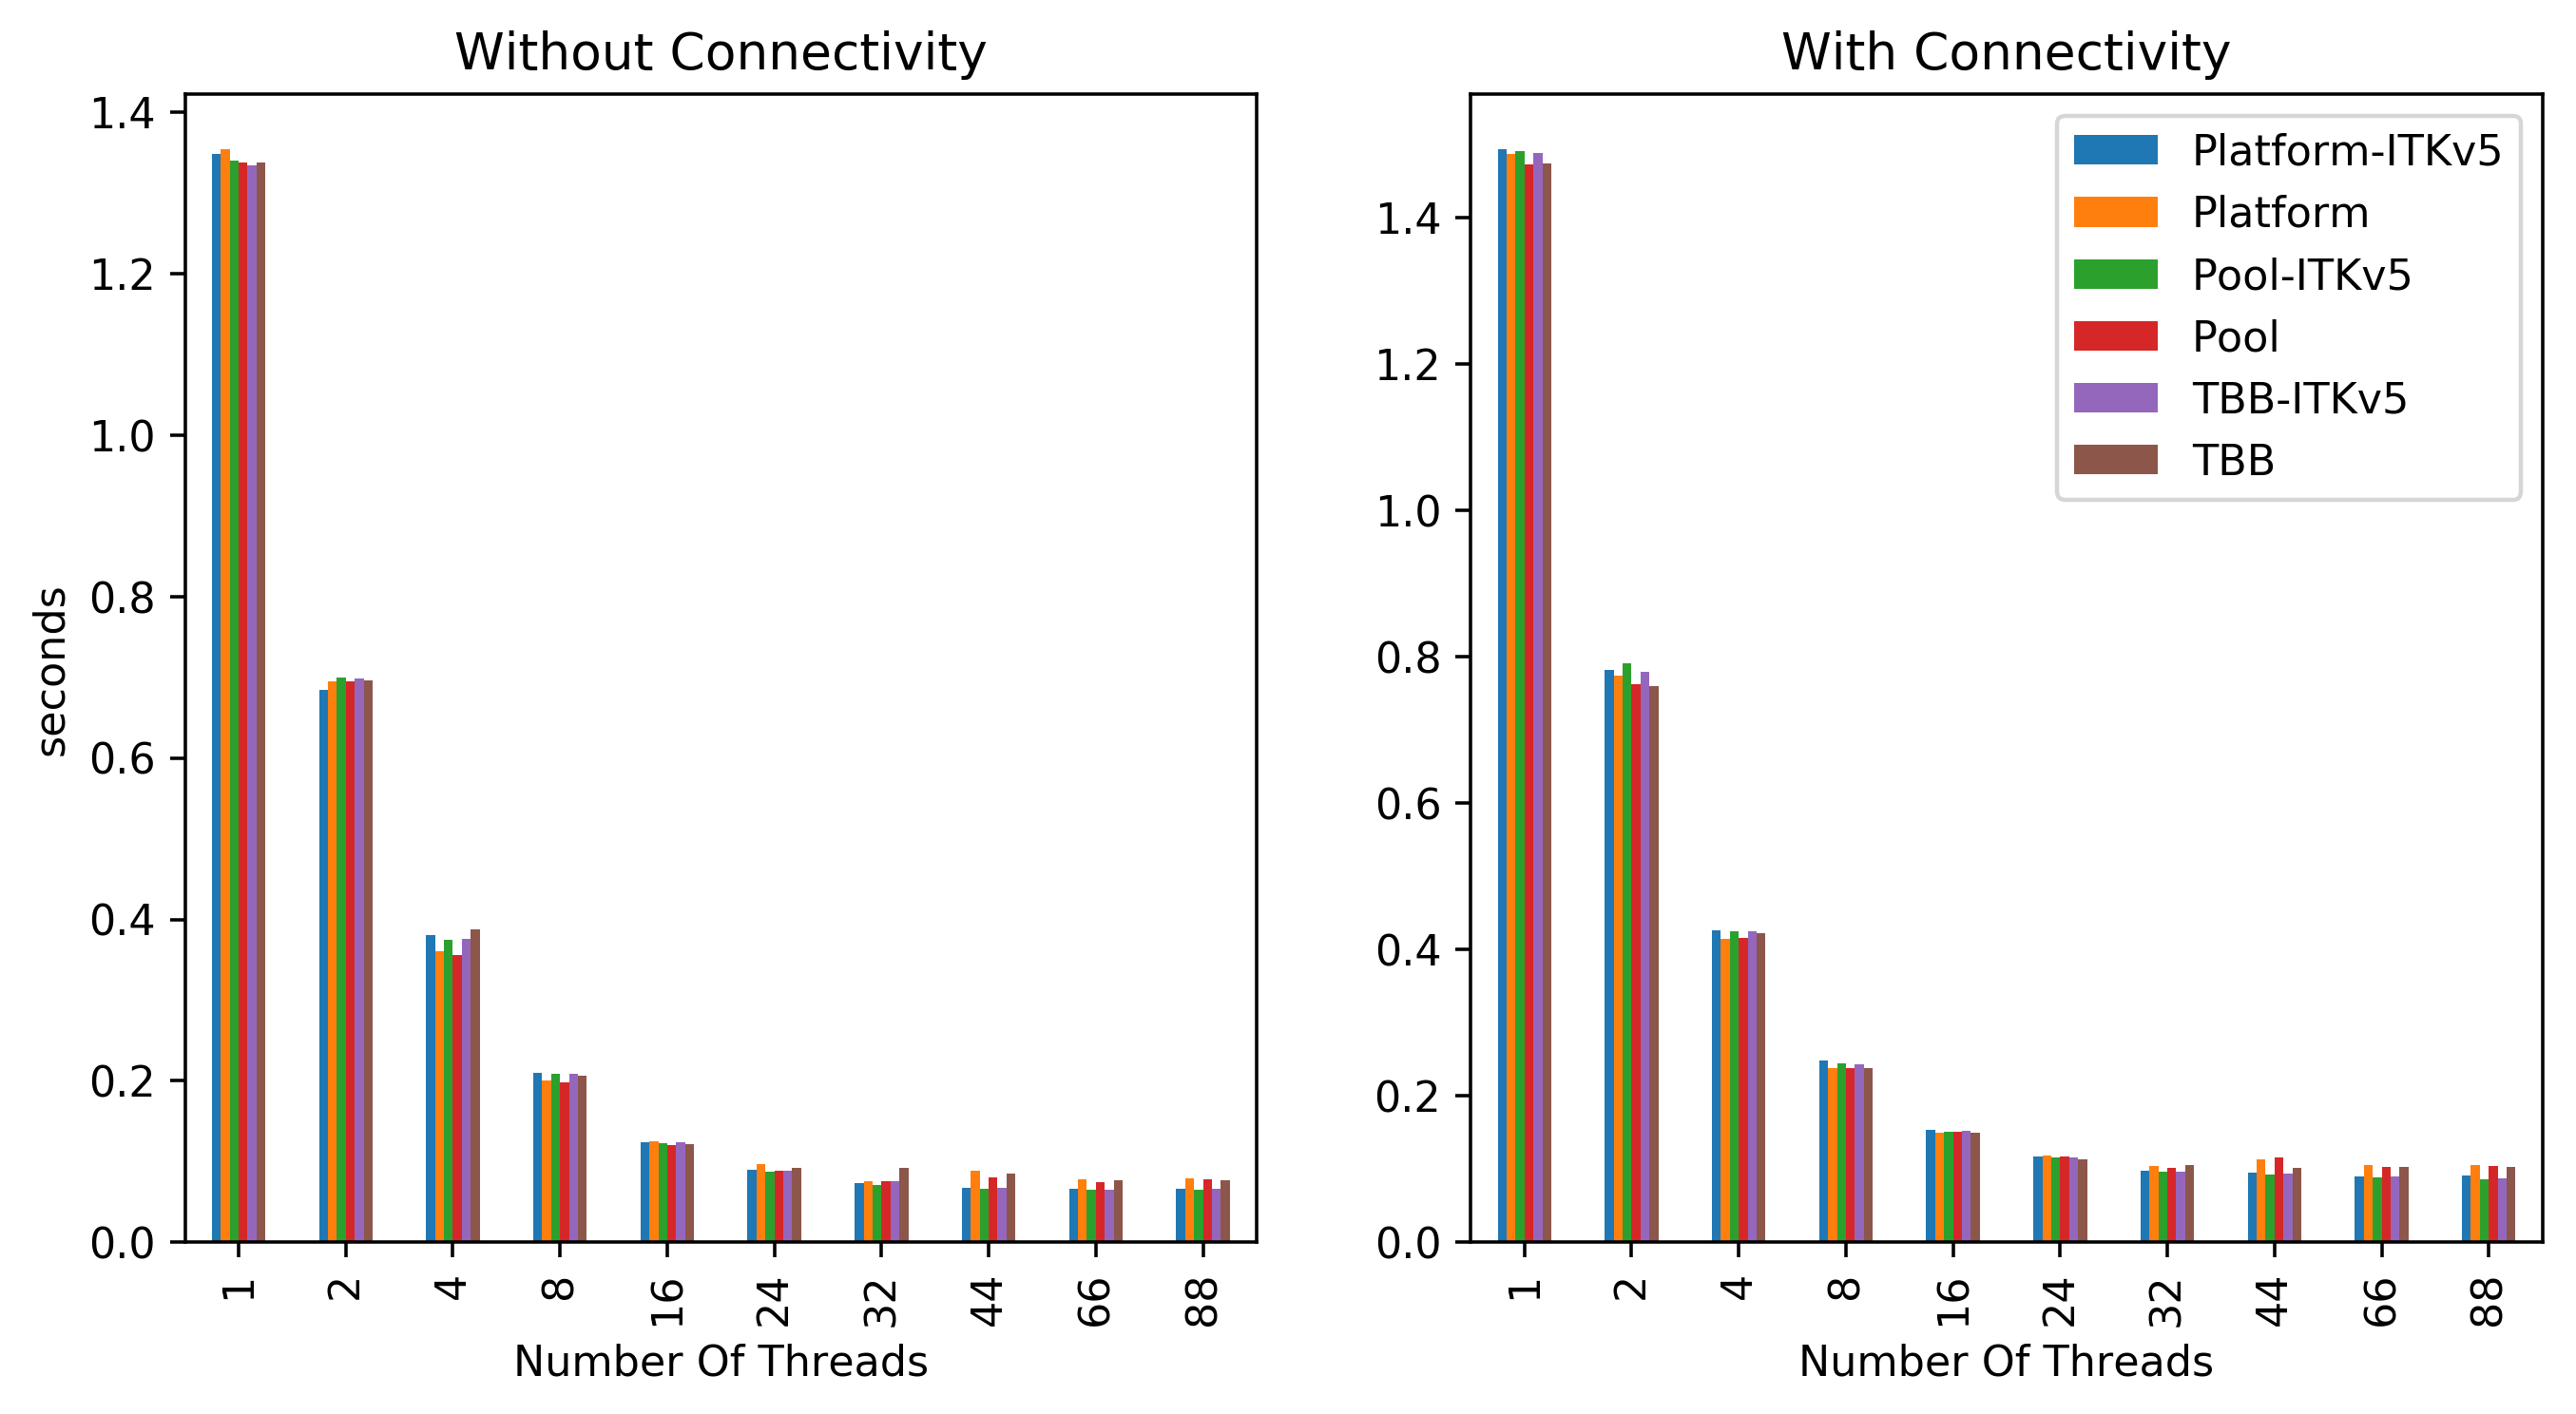

In [66]:
fig, axes = plt.subplots(ncols=2, dpi=320, figsize=(10, 5))

C="Without Connectivity"
plot_data=pd.concat([df_dict[k][C] for k in df_dict.keys()],axis=1,keys=df_dict.keys())

ax = plot_data.plot(ax=axes[0], kind="bar")
ax.set_ylabel("seconds")
ax.legend().set_visible(False)
ax.set_title(C)

C="With Connectivity"
plot_data=pd.concat([df_dict[k][C] for k in df_dict.keys()],axis=1,keys=df_dict.keys())
ax = plot_data.plot(ax=axes[1], kind="bar")
ax.set_title(C)

fig.savefig("ITKv5_time.eps")

In [28]:

C="Without Connectivity"
plot_data=pd.concat([df_dict[k][C] for k in df_dict.keys()],axis=1,keys=df_dict.keys())
display(plot_data)
print(plot_data.to_latex(float_format='%.5f'))
C="With Connectivity"
plot_data=pd.concat([df_dict[k][C] for k in df_dict.keys()],axis=1,keys=df_dict.keys())
display(plot_data)
print(plot_data.to_latex(float_format='%.5f'))


,Platform-ITKv5,Platform,Pool-ITKv5,Pool,TBB-ITKv5,TBB
Number Of Threads,,,,,,
1,1.348666,1.354341,1.339952,1.337945,1.333992,1.337696
2,0.684897,0.695555,0.699267,0.694720,0.698317,0.695679
4,0.380419,0.360963,0.374295,0.356138,0.376501,0.387280
8,0.210548,0.200142,0.208316,0.198591,0.209171,0.206805
16,0.124483,0.124992,0.122768,0.120982,0.124066,0.121993
24,0.089721,0.097004,0.087500,0.089208,0.089049,0.091681
32,0.072991,0.076267,0.071032,0.075834,0.075414,0.092432
44,0.067161,0.088399,0.066334,0.080903,0.067072,0.084944
66,0.066809,0.077910,0.064891,0.074813,0.065518,0.076830


\begin{tabular}{lrrrrrr}
\toprule
{} &  Platform-ITKv5 &  Platform &  Pool-ITKv5 &    Pool &  TBB-ITKv5 &     TBB \\
Number Of Threads &                 &           &             &         &            &         \\
\midrule
1                 &         1.34867 &   1.35434 &     1.33995 & 1.33794 &    1.33399 & 1.33770 \\
2                 &         0.68490 &   0.69555 &     0.69927 & 0.69472 &    0.69832 & 0.69568 \\
4                 &         0.38042 &   0.36096 &     0.37429 & 0.35614 &    0.37650 & 0.38728 \\
8                 &         0.21055 &   0.20014 &     0.20832 & 0.19859 &    0.20917 & 0.20680 \\
16                &         0.12448 &   0.12499 &     0.12277 & 0.12098 &    0.12407 & 0.12199 \\
24                &         0.08972 &   0.09700 &     0.08750 & 0.08921 &    0.08905 & 0.09168 \\
32                &         0.07299 &   0.07627 &     0.07103 & 0.07583 &    0.07541 & 0.09243 \\
44                &         0.06716 &   0.08840 &     0.06633 & 0.08090 &    0.06707 & 0.0

,Platform-ITKv5,Platform,Pool-ITKv5,Pool,TBB-ITKv5,TBB
Number Of Threads,,,,,,
1,1.493840,1.486779,1.491079,1.472998,1.489051,1.474458
2,0.781721,0.774974,0.791795,0.762585,0.779258,0.760143
4,0.426657,0.414371,0.425463,0.415417,0.425301,0.422418
8,0.248948,0.237851,0.244246,0.238198,0.243669,0.238409
16,0.153978,0.149633,0.150485,0.150826,0.152810,0.149504
24,0.117498,0.118660,0.115877,0.116866,0.115427,0.113902
32,0.097887,0.104051,0.095986,0.101636,0.095924,0.105896
44,0.095695,0.113205,0.093298,0.116148,0.093580,0.101337
66,0.090158,0.105753,0.089058,0.103243,0.089584,0.103521


\begin{tabular}{lrrrrrr}
\toprule
{} &  Platform-ITKv5 &  Platform &  Pool-ITKv5 &    Pool &  TBB-ITKv5 &     TBB \\
Number Of Threads &                 &           &             &         &            &         \\
\midrule
1                 &         1.49384 &   1.48678 &     1.49108 & 1.47300 &    1.48905 & 1.47446 \\
2                 &         0.78172 &   0.77497 &     0.79180 & 0.76258 &    0.77926 & 0.76014 \\
4                 &         0.42666 &   0.41437 &     0.42546 & 0.41542 &    0.42530 & 0.42242 \\
8                 &         0.24895 &   0.23785 &     0.24425 & 0.23820 &    0.24367 & 0.23841 \\
16                &         0.15398 &   0.14963 &     0.15049 & 0.15083 &    0.15281 & 0.14950 \\
24                &         0.11750 &   0.11866 &     0.11588 & 0.11687 &    0.11543 & 0.11390 \\
32                &         0.09789 &   0.10405 &     0.09599 & 0.10164 &    0.09592 & 0.10590 \\
44                &         0.09570 &   0.11320 &     0.09330 & 0.11615 &    0.09358 & 0.1

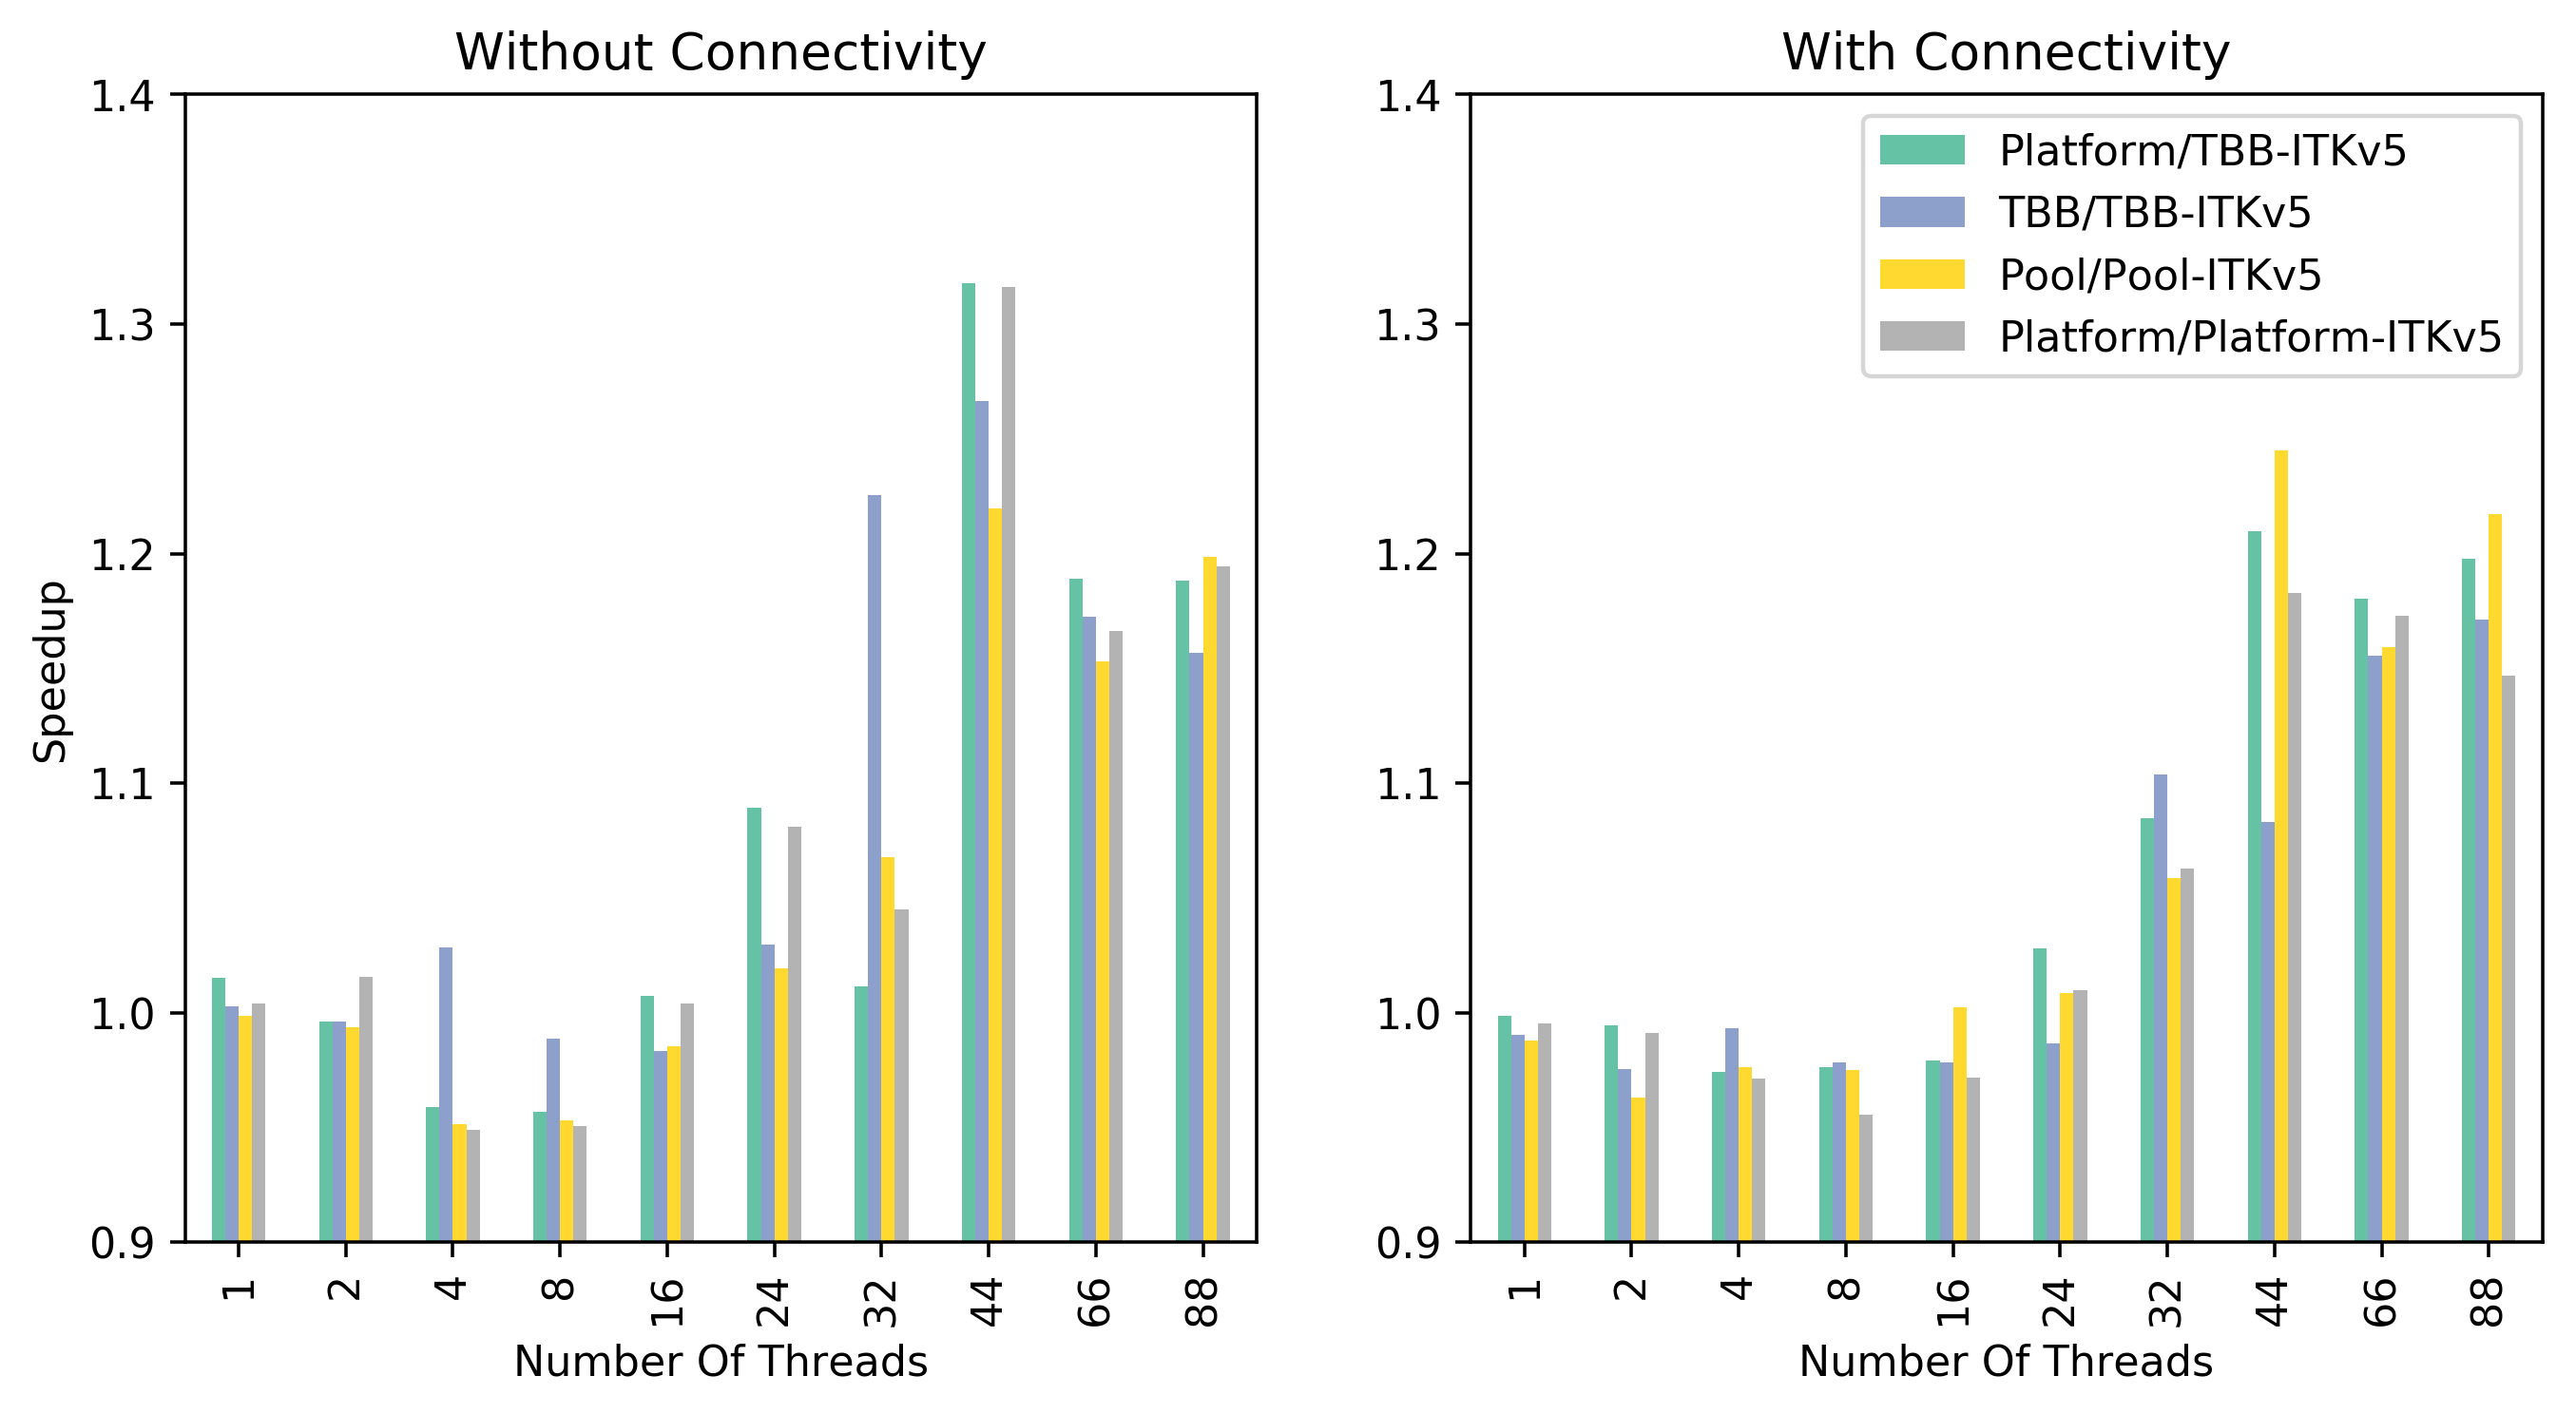

In [59]:
colormap="Set2"
C="Without Connectivity"
plot_data=pd.concat([df_dict["Platform"][C]/df_dict["TBB-ITKv5"][C],
                     df_dict["TBB"][C]/df_dict["TBB-ITKv5"][C],
                     df_dict["Pool"][C]/df_dict["Pool-ITKv5"][C],
                     df_dict["Platform"][C]/df_dict["Platform-ITKv5"][C]],
                    axis=1,
                    keys=["Platform/TBB-ITKv5","TBB/TBB-ITKv5","Pool/Pool-ITKv5","Platform/Platform-ITKv5"])
fig, axes = plt.subplots(ncols=2, dpi=320, figsize=(10, 5))
ax =plot_data.plot(ax=axes[0], kind="bar",ylim=(0.9,1.4),colormap=colormap)
ax.legend().set_visible(False)
ax.set_title(C)
ax.set_ylabel("Speedup")

C="With Connectivity"
plot_data=pd.concat([df_dict["Platform"][C]/df_dict["TBB-ITKv5"][C],
                     df_dict["TBB"][C]/df_dict["TBB-ITKv5"][C],
                     df_dict["Pool"][C]/df_dict["Pool-ITKv5"][C],
                     df_dict["Platform"][C]/df_dict["Platform-ITKv5"][C]],
                    axis=1,
                    keys=["Platform/TBB-ITKv5","TBB/TBB-ITKv5","Pool/Pool-ITKv5","Platform/Platform-ITKv5"])

ax=plot_data.plot(ax=axes[1], kind="bar",ylim=(0.9,1.4),colormap=colormap)
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_title(C)


fig.savefig("ITKv5_speedup.eps")

In [ ]:
display(df_dict["tbb"][C])
display(df_dict["tbb-new"][C])

In [64]:
C="Without Connectivity"
plot_data=pd.concat([df_dict["Platform"][C]/df_dict["TBB-ITKv5"][C],
                     df_dict["TBB"][C]/df_dict["TBB-ITKv5"][C],
                     df_dict["Pool"][C]/df_dict["Pool-ITKv5"][C],
                     df_dict["Platform"][C]/df_dict["Platform-ITKv5"][C]],
                    axis=1,
                    keys=["Platform/TBB-ITKv5","TBB/TBB-ITKv5","Pool/Pool-ITKv5","Platform/Platform-ITKv5"])
display(plot_data)
print(plot_data.to_latex(float_format='%.5f'))

C="With Connectivity"
plot_data=pd.concat([df_dict["Platform"][C]/df_dict["TBB-ITKv5"][C],
                     df_dict["TBB"][C]/df_dict["TBB-ITKv5"][C],
                     df_dict["Pool"][C]/df_dict["Pool-ITKv5"][C],
                     df_dict["Platform"][C]/df_dict["Platform-ITKv5"][C]],
                    axis=1,
                    keys=["Platform/TBB-ITKv5","TBB/TBB-ITKv5","Pool/Pool-ITKv5","Platform/Platform-ITKv5"])
display(plot_data)
print(plot_data.to_latex(float_format='%.5f'))

,Platform/TBB-ITKv5,TBB/TBB-ITKv5,Pool/Pool-ITKv5,Platform/Platform-ITKv5
Number Of Threads,,,,
1,1.015254,1.002777,0.998502,1.004208
2,0.996045,0.996222,0.993497,1.015562
4,0.958731,1.028630,0.951490,0.948857
8,0.956834,0.988688,0.953316,0.950575
16,1.007464,0.983291,0.985452,1.004091
24,1.089334,1.029558,1.019520,1.081174
32,1.011312,1.225662,1.067600,1.044880
44,1.317972,1.266462,1.219632,1.316223
66,1.189140,1.172655,1.152899,1.166156


\begin{tabular}{lrrrr}
\toprule
{} &  Platform/TBB-ITKv5 &  TBB/TBB-ITKv5 &  Pool/Pool-ITKv5 &  Platform/Platform-ITKv5 \\
Number Of Threads &                     &                &                  &                          \\
\midrule
1                 &             1.01525 &        1.00278 &          0.99850 &                  1.00421 \\
2                 &             0.99604 &        0.99622 &          0.99350 &                  1.01556 \\
4                 &             0.95873 &        1.02863 &          0.95149 &                  0.94886 \\
8                 &             0.95683 &        0.98869 &          0.95332 &                  0.95058 \\
16                &             1.00746 &        0.98329 &          0.98545 &                  1.00409 \\
24                &             1.08933 &        1.02956 &          1.01952 &                  1.08117 \\
32                &             1.01131 &        1.22566 &          1.06760 &                  1.04488 \\
44                & 

,Platform/TBB-ITKv5,TBB/TBB-ITKv5,Pool/Pool-ITKv5,Platform/Platform-ITKv5
Number Of Threads,,,,
1,0.998474,0.990200,0.987874,0.995273
2,0.994503,0.975470,0.963109,0.991369
4,0.974301,0.993221,0.976388,0.971204
8,0.976124,0.978412,0.975238,0.955425
16,0.979211,0.978366,1.002266,0.971782
24,1.028009,0.986787,1.008535,1.009890
32,1.084723,1.103958,1.058861,1.062971
44,1.209713,1.082891,1.244915,1.182976
66,1.180491,1.155577,1.159277,1.172974


\begin{tabular}{lrrrr}
\toprule
{} &  Platform/TBB-ITKv5 &  TBB/TBB-ITKv5 &  Pool/Pool-ITKv5 &  Platform/Platform-ITKv5 \\
Number Of Threads &                     &                &                  &                          \\
\midrule
1                 &             0.99847 &        0.99020 &          0.98787 &                  0.99527 \\
2                 &             0.99450 &        0.97547 &          0.96311 &                  0.99137 \\
4                 &             0.97430 &        0.99322 &          0.97639 &                  0.97120 \\
8                 &             0.97612 &        0.97841 &          0.97524 &                  0.95542 \\
16                &             0.97921 &        0.97837 &          1.00227 &                  0.97178 \\
24                &             1.02801 &        0.98679 &          1.00853 &                  1.00989 \\
32                &             1.08472 &        1.10396 &          1.05886 &                  1.06297 \\
44                & 